<img src="images/ai.jpg">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.993047,-0.883267,0.081785,0.456581
2013-01-02,-0.245361,-0.210987,-0.401158,0.490879
2013-01-03,-0.087095,-0.888693,0.728458,1.032870
2013-01-04,-0.533490,0.342931,1.857371,-1.378382
2013-01-05,-0.813212,-0.143413,-0.143205,-0.747151
2013-01-06,-0.198040,-0.179050,1.132997,-0.465052


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [5]:
df2 = pd.DataFrame({ 'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

df2.<TAB>
<pre>
df2.abs                df2.boxplot
df2.add                df2.C
df2.add_prefix         df2.clip
df2.add_suffix         df2.clip_lower
df2.align              df2.clip_upper
df2.all                df2.columns
df2.any                df2.combine
df2.append             df2.combine_first
df2.apply              df2.compound
df2.applymap           df2.consolidate
df2.D
</pre>

As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.

See the Basics section

See the top & bottom rows of the frame

In [7]:
df.head()

,A,B,C,D
2013-01-01,0.993047,-0.883267,0.081785,0.456581
2013-01-02,-0.245361,-0.210987,-0.401158,0.490879
2013-01-03,-0.087095,-0.888693,0.728458,1.032870
2013-01-04,-0.533490,0.342931,1.857371,-1.378382
2013-01-05,-0.813212,-0.143413,-0.143205,-0.747151


In [8]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.533490,0.342931,1.857371,-1.378382
2013-01-05,-0.813212,-0.143413,-0.143205,-0.747151
2013-01-06,-0.198040,-0.179050,1.132997,-0.465052


In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [11]:
 df.values

array([[ 0.99304687, -0.88326675,  0.08178509,  0.45658102],
       [-0.24536131, -0.21098718, -0.4011582 ,  0.49087857],
       [-0.08709508, -0.88869266,  0.72845753,  1.03287006],
       [-0.53349017,  0.34293077,  1.85737067, -1.37838186],
       [-0.81321243, -0.1434133 , -0.14320477, -0.74715127],
       [-0.19804007, -0.17904967,  1.13299711, -0.46505241]])

Describe shows a quick statistic summary of your data

In [12]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.147359,-0.327080,0.542708,-0.101709
std,0.617865,0.478078,0.858498,0.908694
min,-0.813212,-0.888693,-0.401158,-1.378382
25%,-0.461458,-0.715197,-0.086957,-0.676627
50%,-0.221701,-0.195018,0.405121,-0.004236
75%,-0.114831,-0.152322,1.031862,0.482304
max,0.993047,0.342931,1.857371,1.032870


Transposing your data

In [13]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.993047,-0.245361,-0.087095,-0.533490,-0.813212,-0.198040
B,-0.883267,-0.210987,-0.888693,0.342931,-0.143413,-0.179050
C,0.081785,-0.401158,0.728458,1.857371,-0.143205,1.132997
D,0.456581,0.490879,1.032870,-1.378382,-0.747151,-0.465052


Sorting by an axis

In [14]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.456581,0.081785,-0.883267,0.993047
2013-01-02,0.490879,-0.401158,-0.210987,-0.245361
2013-01-03,1.032870,0.728458,-0.888693,-0.087095
2013-01-04,-1.378382,1.857371,0.342931,-0.533490
2013-01-05,-0.747151,-0.143205,-0.143413,-0.813212
2013-01-06,-0.465052,1.132997,-0.179050,-0.198040


Sorting by values

In [15]:
df.sort_values(by='B')

,A,B,C,D
2013-01-03,-0.087095,-0.888693,0.728458,1.032870
2013-01-01,0.993047,-0.883267,0.081785,0.456581
2013-01-02,-0.245361,-0.210987,-0.401158,0.490879
2013-01-06,-0.198040,-0.179050,1.132997,-0.465052
2013-01-05,-0.813212,-0.143413,-0.143205,-0.747151
2013-01-04,-0.533490,0.342931,1.857371,-1.378382


# Selection

Selecting a single column, which yields a Series, equivalent to df.A

In [16]:
df['A']

2013-01-01    0.993047
2013-01-02   -0.245361
2013-01-03   -0.087095
2013-01-04   -0.533490
2013-01-05   -0.813212
2013-01-06   -0.198040
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [17]:
 df[0:3]

,A,B,C,D
2013-01-01,0.993047,-0.883267,0.081785,0.456581
2013-01-02,-0.245361,-0.210987,-0.401158,0.490879
2013-01-03,-0.087095,-0.888693,0.728458,1.032870


In [18]:
 df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.245361,-0.210987,-0.401158,0.490879
2013-01-03,-0.087095,-0.888693,0.728458,1.032870
2013-01-04,-0.533490,0.342931,1.857371,-1.378382


For getting a cross section using a label

In [19]:
 df.loc[dates[0]]

A    0.993047
B   -0.883267
C    0.081785
D    0.456581
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label

In [20]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.993047,-0.883267
2013-01-02,-0.245361,-0.210987
2013-01-03,-0.087095,-0.888693
2013-01-04,-0.533490,0.342931
2013-01-05,-0.813212,-0.143413
2013-01-06,-0.198040,-0.179050


howing label slicing, both endpoints are included

In [21]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.245361,-0.210987
2013-01-03,-0.087095,-0.888693
2013-01-04,-0.533490,0.342931


Reduction in the dimensions of the returned object

In [22]:
df.loc['20130102',['A','B']]

A   -0.245361
B   -0.210987
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value

In [23]:
df.loc[dates[0],'A']

0.9930468677533935

For getting fast access to a scalar (equiv to the prior method)

In [24]:
 df.at[dates[0],'A']

0.9930468677533935

# Selection by Position

Select via the position of the passed integers

In [25]:
df.iloc[3]

A   -0.533490
B    0.342931
C    1.857371
D   -1.378382
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [26]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.533490,0.342931
2013-01-05,-0.813212,-0.143413


By lists of integer position locations, similar to the numpy/python style

In [27]:
 df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.245361,-0.401158
2013-01-03,-0.087095,0.728458
2013-01-05,-0.813212,-0.143205


For slicing rows explicitly

In [28]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.245361,-0.210987,-0.401158,0.490879
2013-01-03,-0.087095,-0.888693,0.728458,1.032870


For slicing columns explicitly

In [29]:
df.iloc[:,1:3]

,B,C
2013-01-01,-0.883267,0.081785
2013-01-02,-0.210987,-0.401158
2013-01-03,-0.888693,0.728458
2013-01-04,0.342931,1.857371
2013-01-05,-0.143413,-0.143205
2013-01-06,-0.179050,1.132997


For getting a value explicitly

In [30]:
df.iloc[1,1]

-0.21098718287329568

For getting fast access to a scalar (equiv to the prior method)

In [31]:
df.iat[1,1]

-0.21098718287329568

# Boolean Indexing

Using a single column’s values to select data.

In [32]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.993047,-0.883267,0.081785,0.456581


Selecting values from a DataFrame where a boolean condition is met.

In [33]:
df[df > 0]

,A,B,C,D
2013-01-01,0.993047,NaN,0.081785,0.456581
2013-01-02,NaN,NaN,NaN,0.490879
2013-01-03,NaN,NaN,0.728458,1.032870
2013-01-04,NaN,0.342931,1.857371,NaN
2013-01-05,NaN,NaN,NaN,NaN
2013-01-06,NaN,NaN,1.132997,NaN


Using the `isin()` method for filtering:

In [34]:
df2 = df.copy()

In [35]:
 df2['E'] = ['one', 'one','two','three','four','three']

In [36]:
df2

,A,B,C,D,E
2013-01-01,0.993047,-0.883267,0.081785,0.456581,one
2013-01-02,-0.245361,-0.210987,-0.401158,0.490879,one
2013-01-03,-0.087095,-0.888693,0.728458,1.032870,two
2013-01-04,-0.533490,0.342931,1.857371,-1.378382,three
2013-01-05,-0.813212,-0.143413,-0.143205,-0.747151,four
2013-01-06,-0.198040,-0.179050,1.132997,-0.465052,three


In [37]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.087095,-0.888693,0.728458,1.032870,two
2013-01-05,-0.813212,-0.143413,-0.143205,-0.747151,four


# Setting

Setting a new column automatically aligns the data by the indexes

In [38]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [39]:
 df['F'] = s1

Setting values by label

In [40]:
df.at[dates[0],'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,-0.883267,0.081785,0.456581,NaN
2013-01-02,-0.245361,-0.210987,-0.401158,0.490879,1.0
2013-01-03,-0.087095,-0.888693,0.728458,1.032870,2.0
2013-01-04,-0.533490,0.342931,1.857371,-1.378382,3.0
2013-01-05,-0.813212,-0.143413,-0.143205,-0.747151,4.0
2013-01-06,-0.198040,-0.179050,1.132997,-0.465052,5.0


Setting values by position

In [41]:
df.iat[0,1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.081785,0.456581,NaN
2013-01-02,-0.245361,-0.210987,-0.401158,0.490879,1.0
2013-01-03,-0.087095,-0.888693,0.728458,1.032870,2.0
2013-01-04,-0.533490,0.342931,1.857371,-1.378382,3.0
2013-01-05,-0.813212,-0.143413,-0.143205,-0.747151,4.0
2013-01-06,-0.198040,-0.179050,1.132997,-0.465052,5.0


Setting by assigning with a numpy array

In [42]:
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.081785,5,NaN
2013-01-02,-0.245361,-0.210987,-0.401158,5,1.0
2013-01-03,-0.087095,-0.888693,0.728458,5,2.0
2013-01-04,-0.533490,0.342931,1.857371,5,3.0
2013-01-05,-0.813212,-0.143413,-0.143205,5,4.0
2013-01-06,-0.198040,-0.179050,1.132997,5,5.0


A where operation with setting.

In [43]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.081785,-5,NaN
2013-01-02,-0.245361,-0.210987,-0.401158,-5,-1.0
2013-01-03,-0.087095,-0.888693,-0.728458,-5,-2.0
2013-01-04,-0.533490,-0.342931,-1.857371,-5,-3.0
2013-01-05,-0.813212,-0.143413,-0.143205,-5,-4.0
2013-01-06,-0.198040,-0.179050,-1.132997,-5,-5.0


# Missing Data

andas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [44]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1

In [45]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.081785,5,NaN,1.0
2013-01-02,-0.245361,-0.210987,-0.401158,5,1.0,1.0
2013-01-03,-0.087095,-0.888693,0.728458,5,2.0,NaN
2013-01-04,-0.533490,0.342931,1.857371,5,3.0,NaN


To drop any rows that have missing data.

In [46]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.245361,-0.210987,-0.401158,5,1.0,1.0


To drop any rows that have missing data.

In [47]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.245361,-0.210987,-0.401158,5,1.0,1.0


Filling missing data

In [48]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.081785,5,5.0,1.0
2013-01-02,-0.245361,-0.210987,-0.401158,5,1.0,1.0
2013-01-03,-0.087095,-0.888693,0.728458,5,2.0,5.0
2013-01-04,-0.533490,0.342931,1.857371,5,3.0,5.0


To get the boolean mask where values are nan

In [49]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


To get the boolean mask where values are nan

# Operations
Operations in general exclude missing data.

Performing a descriptive statistic

In [50]:
df.mean()

A   -0.312867
B   -0.179869
C    0.542708
D    5.000000
F    3.000000
dtype: float64

In [ ]:
Same operation on the other axis

In [51]:
df.mean(1)

2013-01-01    1.270446
2013-01-02    1.028499
2013-01-03    1.350534
2013-01-04    1.933362
2013-01-05    1.580034
2013-01-06    2.151181
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [52]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [53]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.087095,-1.888693,-0.271542,4.0,1.0
2013-01-04,-3.533490,-2.657069,-1.142629,2.0,0.0
2013-01-05,-5.813212,-5.143413,-5.143205,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


# Apply

Applying functions to the data

In [54]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.081785,5,NaN
2013-01-02,-0.245361,-0.210987,-0.319373,10,1.0
2013-01-03,-0.332456,-1.099680,0.409084,15,3.0
2013-01-04,-0.865947,-0.756749,2.266455,20,6.0
2013-01-05,-1.679159,-0.900162,2.123250,25,10.0
2013-01-06,-1.877199,-1.079212,3.256247,30,15.0


In [55]:
df.apply(lambda x: x.max() - x.min())

A    0.813212
B    1.231623
C    2.258529
D    0.000000
F    4.000000
dtype: float64

# Histogramming


In [56]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    6
1    5
2    0
3    3
4    6
5    6
6    2
7    2
8    1
9    3
dtype: int32

In [57]:
s.value_counts()

6    3
3    2
2    2
5    1
1    1
0    1
dtype: int64

# String Methods
Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them).

In [58]:
s =  pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge
## Concat
pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.
<br>Concatenating pandas objects together with `concat():`

In [59]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,1.792310,0.039993,0.774277,0.038416
1,1.315431,-0.855318,0.281040,0.021697
2,-0.632581,0.086933,1.276684,0.362183
3,-1.421881,1.745604,0.482231,-1.790248
4,-0.047946,-1.443516,-1.428927,-0.078576
5,0.082564,1.475150,0.105506,-0.885853
6,0.529326,-0.014233,-0.956702,0.727786
7,0.173954,0.181362,0.287041,1.476231
8,1.321193,0.147327,-2.197856,-0.058980
9,-2.318829,-0.892309,-0.180432,2.080513


In [60]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [61]:
pieces

[          0         1         2         3
 0  1.792310  0.039993  0.774277  0.038416
 1  1.315431 -0.855318  0.281040  0.021697
 2 -0.632581  0.086933  1.276684  0.362183,
           0         1         2         3
 3 -1.421881  1.745604  0.482231 -1.790248
 4 -0.047946 -1.443516 -1.428927 -0.078576
 5  0.082564  1.475150  0.105506 -0.885853
 6  0.529326 -0.014233 -0.956702  0.727786,
           0         1         2         3
 7  0.173954  0.181362  0.287041  1.476231
 8  1.321193  0.147327 -2.197856 -0.058980
 9 -2.318829 -0.892309 -0.180432  2.080513]

In [62]:
pd.concat(pieces)

,0,1,2,3
0,1.792310,0.039993,0.774277,0.038416
1,1.315431,-0.855318,0.281040,0.021697
2,-0.632581,0.086933,1.276684,0.362183
3,-1.421881,1.745604,0.482231,-1.790248
4,-0.047946,-1.443516,-1.428927,-0.078576
5,0.082564,1.475150,0.105506,-0.885853
6,0.529326,-0.014233,-0.956702,0.727786
7,0.173954,0.181362,0.287041,1.476231
8,1.321193,0.147327,-2.197856,-0.058980
9,-2.318829,-0.892309,-0.180432,2.080513


# Join

SQL style merges.

In [63]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [64]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [65]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another example that can be given is:

In [66]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [67]:
left

,key,lval
0,foo,1
1,bar,2


In [68]:
right

,key,rval
0,foo,4
1,bar,5


In [69]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


# Append

Append rows to a dataframe

In [70]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,1.732948,0.133055,-1.893431,-0.613525
1,0.797132,1.234030,-1.395682,-0.484123
2,0.249333,-1.527711,-1.202209,-0.986486
3,0.941139,0.711312,0.752889,-1.442610
4,-0.829459,0.073496,-1.091834,-1.362955
5,-0.615588,0.083668,-0.161185,0.167446
6,-0.289090,-0.132636,-1.296024,-0.285229
7,-1.465258,1.330512,1.357497,1.331446


In [71]:
s = df.iloc[3]
s

A    0.941139
B    0.711312
C    0.752889
D   -1.442610
Name: 3, dtype: float64

In [72]:
df.append(s, ignore_index=True)

,A,B,C,D
0,1.732948,0.133055,-1.893431,-0.613525
1,0.797132,1.234030,-1.395682,-0.484123
2,0.249333,-1.527711,-1.202209,-0.986486
3,0.941139,0.711312,0.752889,-1.442610
4,-0.829459,0.073496,-1.091834,-1.362955
5,-0.615588,0.083668,-0.161185,0.167446
6,-0.289090,-0.132636,-1.296024,-0.285229
7,-1.465258,1.330512,1.357497,1.331446
8,0.941139,0.711312,0.752889,-1.442610


# Grouping

In [73]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar','foo', 'bar', 'foo', 'foo'],
                  'B' : ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                  'C' : np.random.randn(8),
                  'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.878228,1.069136
1,bar,one,-0.399352,-0.409727
2,foo,two,-0.316853,-0.268115
3,bar,three,-0.619290,1.187957
4,foo,two,0.759602,-0.242815
5,bar,two,-1.492757,0.296033
6,foo,one,0.055341,-0.004583
7,foo,three,-0.222281,0.417895


Grouping and then applying a function sum to the resulting groups.

In [74]:
df.groupby('A').sum()

,C,D
A,,
bar,-2.511399,1.074263
foo,1.154038,0.971517


Grouping by multiple columns forms a hierarchical index, which we then apply the function.

In [75]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.399352 -0.409727
    three -0.619290  1.187957
    two   -1.492757  0.296033
foo one    0.933570  1.064553
    three -0.222281  0.417895
    two    0.442749 -0.510930

# Reshaping

In [76]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz','foo', 'foo', 'qux', 'qux'],
                   ['one', 'two', 'one', 'two','one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [77]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [78]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     0.193946  0.694422
      two     0.708640  1.624289
baz   one    -0.257212  1.232662
      two     1.518558  0.515910
foo   one    -0.040377  0.097255
      two     0.042261 -0.231808
qux   one    -0.542428 -0.581483
      two    -0.947880 -1.303162

In [79]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.193946  0.694422
      two     0.708640  1.624289
baz   one    -0.257212  1.232662
      two     1.518558  0.515910

The stack() method “compresses” a level in the DataFrame’s columns.

In [80]:
stacked = df2.stack()

In [81]:
stacked

first  second   
bar    one     A    0.193946
               B    0.694422
       two     A    0.708640
               B    1.624289
baz    one     A   -0.257212
               B    1.232662
       two     A    1.518558
               B    0.515910
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:

In [82]:
stacked.unstack()

A         B
first second                    
bar   one     0.193946  0.694422
      two     0.708640  1.624289
baz   one    -0.257212  1.232662
      two     1.518558  0.515910

In [83]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.193946  0.708640
      B  0.694422  1.624289
baz   A -0.257212  1.518558
      B  1.232662  0.515910

In [84]:
 stacked.unstack(0)

first          bar       baz
second                      
one    A  0.193946 -0.257212
       B  0.694422  1.232662
two    A  0.708640  1.518558
       B  1.624289  0.515910

In [85]:
stacked

first  second   
bar    one     A    0.193946
               B    0.694422
       two     A    0.708640
               B    1.624289
baz    one     A   -0.257212
               B    1.232662
       two     A    1.518558
               B    0.515910
dtype: float64

# Pivot Tables

In [86]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df 

,A,B,C,D,E
0,one,A,foo,1.618725,-0.803482
1,one,B,foo,0.715543,0.228161
2,two,C,foo,0.122537,-0.180647
3,three,A,bar,1.543881,1.676480
4,one,B,bar,0.045591,-0.915492
5,one,C,bar,1.978988,-0.129818
6,two,A,foo,1.611499,0.805514
7,three,B,foo,0.864916,-0.636378
8,one,C,foo,0.401359,-1.508967
9,one,A,bar,0.271718,-0.741090


We can produce pivot tables from this data very easily:

In [87]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.271718  1.618725
      B  0.045591  0.715543
      C  1.978988  0.401359
three A  1.543881       NaN
      B       NaN  0.864916
      C -0.839346       NaN
two   A       NaN  1.611499
      B -1.678191       NaN
      C       NaN  0.122537

# Time Series
pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications.

In [88]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [89]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00    160
2012-01-01 00:00:01     84
2012-01-01 00:00:02    464
2012-01-01 00:00:03    265
2012-01-01 00:00:04    479
2012-01-01 00:00:05    413
2012-01-01 00:00:06     70
2012-01-01 00:00:07     65
2012-01-01 00:00:08    239
2012-01-01 00:00:09    224
2012-01-01 00:00:10     66
2012-01-01 00:00:11     92
2012-01-01 00:00:12    210
2012-01-01 00:00:13    339
2012-01-01 00:00:14    331
2012-01-01 00:00:15    449
2012-01-01 00:00:16     91
2012-01-01 00:00:17    203
2012-01-01 00:00:18    140
2012-01-01 00:00:19    407
2012-01-01 00:00:20    174
2012-01-01 00:00:21    479
2012-01-01 00:00:22    115
2012-01-01 00:00:23    368
2012-01-01 00:00:24      1
2012-01-01 00:00:25    461
2012-01-01 00:00:26    469
2012-01-01 00:00:27    406
2012-01-01 00:00:28    481
2012-01-01 00:00:29    261
                      ... 
2012-01-01 00:01:10     41
2012-01-01 00:01:11    212
2012-01-01 00:01:12    360
2012-01-01 00:01:13    491
2012-01-01 00:01:14     26
2012-01-01 00:01:15    144
2

In [90]:
ts.resample('5Min').sum()

2012-01-01    24658
Freq: 5T, dtype: int32

Time zone representation

In [91]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [92]:
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.664715
2012-03-07    1.490700
2012-03-08    1.024320
2012-03-09    0.009328
2012-03-10    0.458009
Freq: D, dtype: float64

In [93]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.664715
2012-03-07 00:00:00+00:00    1.490700
2012-03-08 00:00:00+00:00    1.024320
2012-03-09 00:00:00+00:00    0.009328
2012-03-10 00:00:00+00:00    0.458009
Freq: D, dtype: float64

Convert to another time zone

In [94]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.664715
2012-03-06 19:00:00-05:00    1.490700
2012-03-07 19:00:00-05:00    1.024320
2012-03-08 19:00:00-05:00    0.009328
2012-03-09 19:00:00-05:00    0.458009
Freq: D, dtype: float64

Converting between time span representations

In [95]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [96]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    0.297307
2012-02-29    1.956440
2012-03-31   -1.125201
2012-04-30   -0.592679
2012-05-31   -0.677810
Freq: M, dtype: float64

In [97]:
ps = ts.to_period()
ps

2012-01    0.297307
2012-02    1.956440
2012-03   -1.125201
2012-04   -0.592679
2012-05   -0.677810
Freq: M, dtype: float64

In [98]:
ps.to_timestamp()

2012-01-01    0.297307
2012-02-01    1.956440
2012-03-01   -1.125201
2012-04-01   -0.592679
2012-05-01   -0.677810
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [99]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]', freq='Q-NOV')

In [100]:
ts = pd.Series(np.random.randn(len(prng)), prng)
ts

1990Q1    1.246126
1990Q2   -0.597998
1990Q3   -1.831696
1990Q4    0.210310
1991Q1    0.275672
1991Q2    1.006025
1991Q3    0.373031
1991Q4   -0.553267
1992Q1   -0.649350
1992Q2    0.049640
1992Q3   -1.083089
1992Q4   -0.195482
1993Q1    0.582815
1993Q2    0.108613
1993Q3   -1.634629
1993Q4   -0.421419
1994Q1   -0.987435
1994Q2   -0.079026
1994Q3   -0.868569
1994Q4    1.324154
1995Q1   -0.672349
1995Q2   -0.666007
1995Q3    0.564611
1995Q4   -0.408951
1996Q1    1.418475
1996Q2    1.111295
1996Q3   -0.903333
1996Q4   -1.100888
1997Q1    0.337182
1997Q2   -1.284495
1997Q3    0.049955
1997Q4    0.837809
1998Q1   -0.188861
1998Q2   -1.203452
1998Q3    0.649371
1998Q4   -0.973227
1999Q1    0.187199
1999Q2   -0.527410
1999Q3    1.478834
1999Q4   -0.018183
2000Q1   -1.946278
2000Q2    0.665221
2000Q3    1.317694
2000Q4    1.946427
Freq: Q-NOV, dtype: float64

In [101]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    1.246126
1990-06-01 09:00   -0.597998
1990-09-01 09:00   -1.831696
1990-12-01 09:00    0.210310
1991-03-01 09:00    0.275672
Freq: H, dtype: float64

# Categoricals

In [102]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Convert the raw grades to a categorical data type.

In [103]:
df["grade"] = df["raw_grade"].astype("category")

In [104]:
df.grade

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [105]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [106]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [107]:
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

In [108]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows also empty categories.

In [109]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting

In [110]:
import matplotlib.pyplot as plt
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

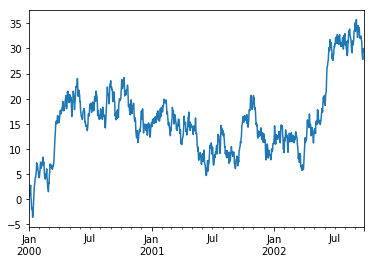

In [111]:
ts = ts.cumsum()
ts.plot()
plt.show()

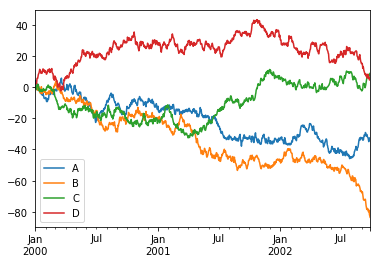

In [112]:
df = pd.DataFrame(np.random.randn(1000, 4), 
                  index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')
plt.show()

# Getting Data In/Out

In [113]:
df.to_csv('foo.csv')

In [114]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.336364,-0.111491,-0.118587,2.273679
1,2000-01-02,4.277186,-0.593601,-0.429127,2.273015
2,2000-01-03,3.408565,-0.346392,0.677386,2.145715
3,2000-01-04,2.601690,-0.175201,-1.359702,2.172661
4,2000-01-05,1.800545,1.117880,-1.715052,2.660907
5,2000-01-06,1.002405,0.390874,0.103956,5.442980
6,2000-01-07,-0.277189,-0.535231,1.171017,5.661763
7,2000-01-08,-1.369685,-2.067983,1.925877,5.531855
8,2000-01-09,-0.446030,-2.110969,1.487226,6.822331
9,2000-01-10,0.193556,-1.287555,1.336014,8.041054


In [115]:
df.to_hdf('foo.h5','df')

In [116]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,1.336364,-0.111491,-0.118587,2.273679
2000-01-02,4.277186,-0.593601,-0.429127,2.273015
2000-01-03,3.408565,-0.346392,0.677386,2.145715
2000-01-04,2.601690,-0.175201,-1.359702,2.172661
2000-01-05,1.800545,1.117880,-1.715052,2.660907
2000-01-06,1.002405,0.390874,0.103956,5.442980
2000-01-07,-0.277189,-0.535231,1.171017,5.661763
2000-01-08,-1.369685,-2.067983,1.925877,5.531855
2000-01-09,-0.446030,-2.110969,1.487226,6.822331
2000-01-10,0.193556,-1.287555,1.336014,8.041054


# Excel

Writing to an excel file

In [117]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [118]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,1.336364,-0.111491,-0.118587,2.273679
2000-01-02,4.277186,-0.593601,-0.429127,2.273015
2000-01-03,3.408565,-0.346392,0.677386,2.145715
2000-01-04,2.601690,-0.175201,-1.359702,2.172661
2000-01-05,1.800545,1.117880,-1.715052,2.660907
2000-01-06,1.002405,0.390874,0.103956,5.442980
2000-01-07,-0.277189,-0.535231,1.171017,5.661763
2000-01-08,-1.369685,-2.067983,1.925877,5.531855
2000-01-09,-0.446030,-2.110969,1.487226,6.822331
2000-01-10,0.193556,-1.287555,1.336014,8.041054


# Gotchas

If you are trying an operation and you see an exception like:

In [119]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().